# Assignment 4 Build Models using Linear Regression

## Learning Objectives 

* Identify linear regression algorithm 
* Identify how linear regression can be used when working with data
* Apply linear regression to build data models
* Evaluate and communicate analysis results by applying linear regression to learn from data

## Overview

In this assignment, you will examine how to use regressions to analyze data.  In particular, you will approach several problems using a data set that represents bluegill data instances randomly sampled from Lake Mary in Minnesota.  The researchers (Cook and Weisberg, 1999) measured and recorded the data in the file (fish.txt).  You will use regression analysis to build models to conduct predictions. You are required to use **polyfit** and **polyval** in numpy library as we learned in the lectures. **If you use any other libries, your solutions will not get any points.**  

For this assignment, you will need to include markup and code cells in this notebook so that you can address questions based on the plots generated from the different problems. In your submitted document, you need to include the created visualization plots by running your code in the notebook. Even if you believe your plots are wrong, you stil need to answer the question according to your plots/code and thoughts, and you can include an explanation of what you think should have happened. Make sure you answer the questions in full sentences.


## Problem 1

You should plot the data in the data file (fish.txt). Your plot should plot y, length (in mm) of the fish, versus x, age (in years) of the fish, as markers. 


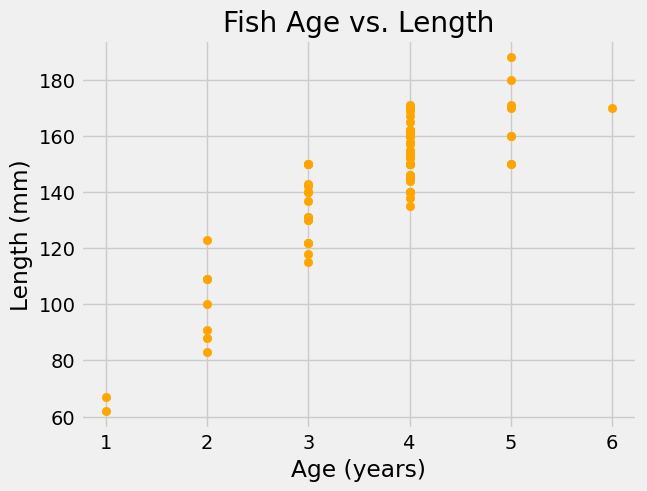

In [46]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

def get_data():
    with open("fish.txt", 'r') as dataFile:
        age = []
        length = []
        next(dataFile) 
        for line in dataFile:
            a, l = line.split()
            age.append(float(a))
            length.append(float(l))
    return age, length

def label_plot():
    plt.title('Fish Age vs. Length')
    plt.xlabel('Age (years)')
    plt.ylabel('Length (mm)')

def plot_data():
    xVals, yVals = get_data()
    xVals = np.array(xVals)
    yVals = np.array(yVals)
    plt.scatter(xVals, yVals, color="orange")
    label_plot()
    plt.show()


plot_data()


## Problem 2

You need to address the question: how is the length of a bluegill fish (dependent variable) related to its age (independent variable)? Given the data points you have, you need to build three models: a line model, a perabela model, and a cubic model using the **polyfit** function in the numpy library. When making predications using a model resulted by polyfit, you are required to use **polyval**. For each of the three regression models you build, you need to compute the R-squared value for the model and plot the data along with the fit curve.

For the plots, you should plot data points (x,y) as blue dots and your fit curves (aka models) as colorful lines in a figure. You should also label the plot axes appropriately and have a title and legends reporting information of your regression models and R-square values evaluated on the given data points. 

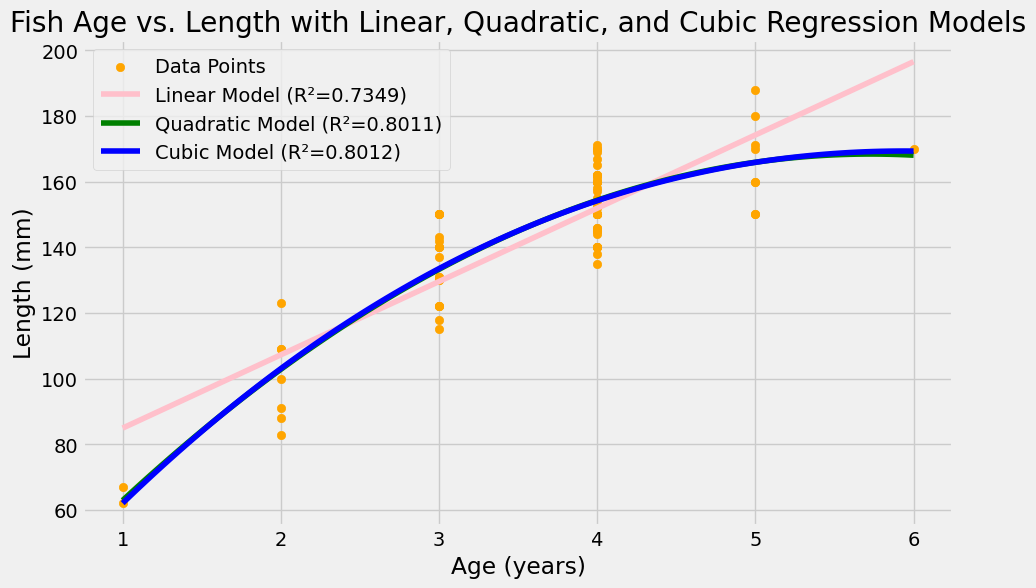

In [62]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

def get_data():
    with open("fish.txt", 'r') as dataFile:
        age = []
        length = []
        next(dataFile)  
        for line in dataFile:
            a, l = line.split()
            age.append(float(a))
            length.append(float(l))
    return np.array(age), np.array(length)


def calculate_r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


age, length = get_data()


plt.figure(figsize=(10, 6))
plt.scatter(age, length, color="orange", label="Data Points")


models = {'Linear': 1, 'Quadratic': 2, 'Cubic': 3}
colors = {'Linear': 'pink', 'Quadratic': 'green', 'Cubic': 'blue'}


for model_name, degree in models.items():
   
    coefficients = np.polyfit(age, length, degree)
 
    length_pred = np.polyval(coefficients, age)
   
    r_squared = calculate_r_squared(length, length_pred)
   
    age_range = np.linspace(min(age), max(age), 100)
    length_range = np.polyval(coefficients, age_range)
  
    plt.plot(age_range, length_range, color=colors[model_name],
             label=f"{model_name} Model (R²={r_squared:.4f})")


plt.xlabel('Age (years)')
plt.ylabel('Length (mm)')
plt.title('Fish Age vs. Length with Linear, Quadratic, and Cubic Regression Models')
plt.legend()
plt.show()


## Problem 3

You need to address the question: 

what is the length of a randomly selected five-year-old bluegill fish? 

Note that this question should be addressed based on a chosen model you built in problem 2's solution. You should use the model to make a prediction on the length based on the age. You need to include code you used to come up the answer when addressing this question.

In [60]:
import numpy as np


coefficients_cubic = np.polyfit(age, length, 3)


age_to_predict = 5
predicted_length = np.polyval(coefficients_cubic, age_to_predict)

print(f"The predicted length of a five-year-old bluegill fish is approximately {predicted_length:.2f} mm.")


The predicted length of a five-year-old bluegill fish is approximately 165.87 mm.


## Problem 4

You need to address the question: how is the length of a bluegill fish (dependent variable) related to its age (independent variable)? For this problem, you need to apply **cross validation** to build, evaluate, and decide the a model that fits the data points.  For the regression model you choose, you need to compute the R-squared value(s) to support your model choice. 

For the plot, you should plot data points (x,y) as blue dots and your best fit curve (aka model) as a red solid line. You should also label the axes of this figure appropriately and have a title reporting information including degree of your regression model and R-square values of your model evaluated on the given data points. 



Degree 1 model average R²: 0.4654
Degree 2 model average R²: 0.6767
Degree 3 model average R²: 0.7358


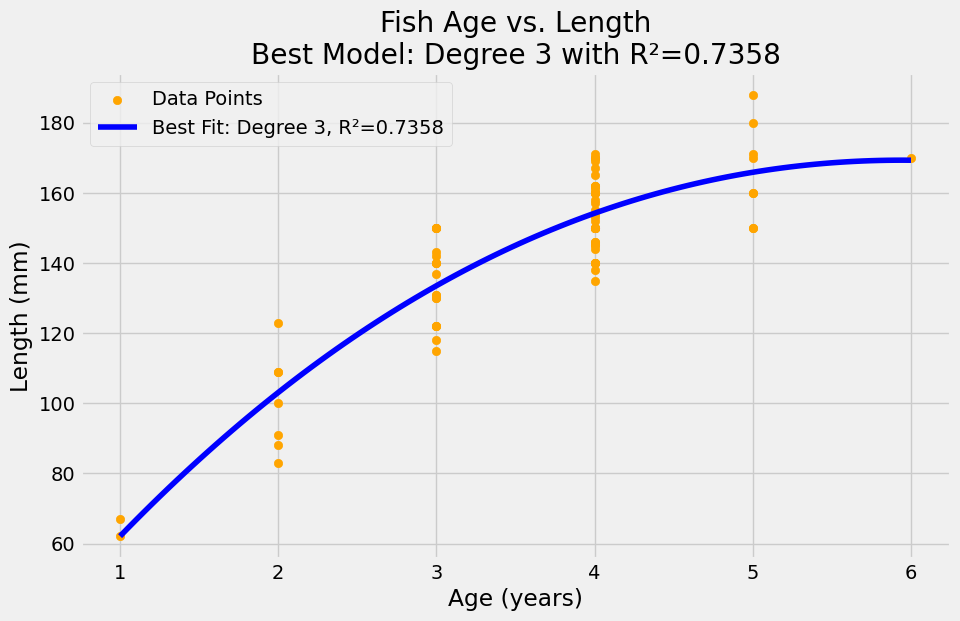

In [74]:
import numpy as np
import matplotlib.pyplot as plt


def get_data():
    with open("fish.txt", 'r') as dataFile:
        age = []
        length = []
        next(dataFile)  # Skip header
        for line in dataFile:
            a, l = line.split()
            age.append(float(a))
            length.append(float(l))
    return np.array(age), np.array(length)


def calculate_r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


def cross_validate_model(x, y, degree, k=5):
    # Shuffle indices
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    
  
    fold_size = len(x) // k
    r2_scores = []

    for i in range(k):
        
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.delete(indices, test_indices)

        
        x_train, y_train = x[train_indices], y[train_indices]
        x_test, y_test = x[test_indices], y[test_indices]

        
        coefficients = np.polyfit(x_train, y_train, degree)
        
        y_pred = np.polyval(coefficients, x_test)
        
        r2_scores.append(calculate_r_squared(y_test, y_pred))
    

    avg_r2 = np.mean(r2_scores)
    return avg_r2


age, length = get_data()


degrees = [1, 2, 3]
best_degree = None
best_r2 = -np.inf

for degree in degrees:
    avg_r2 = cross_validate_model(age, length, degree)
    print(f"Degree {degree} model average R²: {avg_r2:.4f}")
    if avg_r2 > best_r2:
        best_r2 = avg_r2
        best_degree = degree

best_coefficients = np.polyfit(age, length, best_degree)
length_pred = np.polyval(best_coefficients, age)


plt.figure(figsize=(10, 6))
plt.scatter(age, length, color="orange", label="Data Points")
age_range = np.linspace(min(age), max(age), 100)
length_best_fit = np.polyval(best_coefficients, age_range)
plt.plot(age_range, length_best_fit, color="blue", label=f"Best Fit: Degree {best_degree}, R²={best_r2:.4f}")


plt.xlabel("Age (years)")
plt.ylabel("Length (mm)")
plt.title(f"Fish Age vs. Length\nBest Model: Degree {best_degree} with R²={best_r2:.4f}")
plt.legend()
plt.show()


## Problem 5
First, you need to address the question: 

how is the length of a bluegill fish (dependent variable) related to its age (independent variable)? 

For this problem, you are still required to apply cross validation to build, evaluate, and decide the a model that fits the data points.  To evaluate your models, however, you need to compute the **Root Mean Square Error(RMSE)**, which computation is given below. 

RMSE provides a way to measure the error of a model in predicting quantitative data. 

Secondly, you need to address the below questions:

What is the choice of the model based on your evaluation using RMSE? Is it same or different from the model you chose in Problem 4? And how do you think about the chosen model(s) based on your evaluations?

The below code cell provides a definition of RMSE in Python. You can just apply it in your code. 

Degree 1 model average RMSE: 12.1788
Degree 2 model average RMSE: 10.6948
Degree 3 model average RMSE: 10.8316


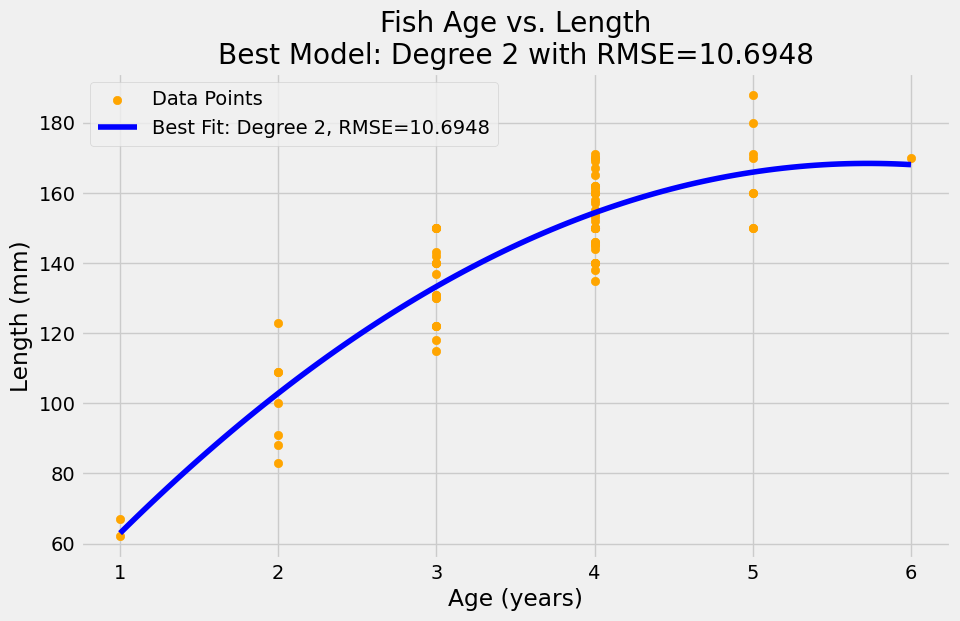

In [76]:
def rmse(y, estimated):
    """
    Calculate the root mean square error term.

    Args:
        y: an 1-d numpy array with length N, representing the y-coordinates of
            the N sample points
        estimated: an 1-d numpy array of values estimated by the regression
            model

    Returns:
        a float for the root mean square error term
    """

    return np.sqrt(sum((y-estimated)**2)/len(y))
def cross_validate_rmse(x, y, degree, k=5):
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    fold_size = len(x) // k
    rmse_scores = []

    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.delete(indices, test_indices)
        coefficients = np.polyfit(x[train_indices], y[train_indices], degree)
        y_pred = np.polyval(coefficients, x[test_indices])
        rmse_scores.append(rmse(y[test_indices], y_pred))
    
    return np.mean(rmse_scores)


age, length = get_data()


degrees = [1, 2, 3]
best_degree, best_rmse = None, np.inf

for degree in degrees:
    avg_rmse = cross_validate_rmse(age, length, degree)
    print(f"Degree {degree} model average RMSE: {avg_rmse:.4f}")
    if avg_rmse < best_rmse:
        best_rmse, best_degree = avg_rmse, degree


best_coefficients = np.polyfit(age, length, best_degree)
plt.figure(figsize=(10, 6))
plt.scatter(age, length, color="orange", label="Data Points")
age_range = np.linspace(min(age), max(age), 100)
plt.plot(age_range, np.polyval(best_coefficients, age_range), color="blue", label=f"Best Fit: Degree {best_degree}, RMSE={best_rmse:.4f}")
plt.xlabel("Age (years)")
plt.ylabel("Length (mm)")
plt.title(f"Fish Age vs. Length\nBest Model: Degree {best_degree} with RMSE={best_rmse:.4f}")
plt.legend()
plt.show()


# Turn-in
You need to turn in at least two files for your submission:

* Your notebook file that contains the code and presentation. You need to run all you cells and present the results in the notebook document.
* The data file you used to build models. 
* Any other supplementary documents you want to submit to D2L Assignments folder 

You need to package the files into a zip archive and upload the zip file to D2L assignment folder <b>Assignment 4</b>

